In [1]:
import numpy as np
import pandas as pd
import math as m
from scipy.optimize import fsolve
import matplotlib.pyplot as plt 
import warnings

## Usefull func

In [2]:
def power_plotter(u,P):
  """Plot the power curve for a given array of wind speeds."""
  plt.figure(figsize=[20,12])
  plt.plot(u,P,'--x')
  plt.ylabel('P [MW]',fontsize=20)
  plt.xlabel('V [m/s]',fontsize=20)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.grid()
  #plt.savefig("Q3_pow.jpg")
  #files.download("Q3_pow.jpg") 
  plt.show()
def thrust_plotter(u,T):
  """Plot the thrust curve for a given array of wind speeds."""
  plt.figure(figsize=[20,12])
  plt.plot(u,T,'--x')
  plt.ylabel('T [kN]',fontsize=20)
  plt.xlabel('V [m/s]',fontsize=20)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.grid()
  #plt.savefig("Q3_thr.jpg")
  #files.download("Q3_thr.jpg") 
  plt.show()
def bending_plotter(r,Mz,My,u):
  """Plot the bendins moment in axe z (vertial) and ax y"""
  plt.figure(figsize=[20,12])
  plt.title(r"$v_0$="+str(u)+" [m/s]",fontsize=20)
  plt.plot(r,Mz/10**6,label=r"$M_z$")
  plt.plot(r,My/10**6,label=r"$M_y$")
  plt.ylabel('Mbend [MNm]',fontsize=20)
  plt.xlabel('r [m]',fontsize=20)
  plt.legend(fontsize=20)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.grid()
  #plt.savefig("Q3_thr.jpg")
  #files.download("Q3_thr.jpg") 
  plt.show()
def deflection_plotter(r,uy,uz,u):
  """Plot the deflection in axe z and y"""
  plt.figure(figsize=[20,12])
  plt.title(r"$v_0$="+str(u)+" [m/s]",fontsize=20)
  plt.plot(r,uy,label=r"$u_y$")
  plt.plot(r,uz,label=r"$u_z$")
  plt.ylabel('u(x) [m]',fontsize=20)
  plt.xlabel('r [m]',fontsize=20)
  plt.legend(fontsize=20)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.grid()
  #plt.savefig("Q3_thr.jpg")
  #files.download("Q3_thr.jpg") 
  plt.show()
def eigen_plotter(r,ymode,zmode,w1,w2):
    plt.figure(figsize=[20,12])
    plt.title(r"$\omega_y$="+str(w1)+" $\omega_z$="+str(w2)+" [rad/s]",fontsize=20)
    plt.plot(r,ymode,label=r"$u_y$")
    plt.plot(r,zmode,label=r"$u_z$")
    plt.ylabel(r'$u/$abs($u$)$_{max}$',fontsize=20)
    plt.xlabel('r/R',fontsize=20)
    plt.legend(fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid()
    #plt.savefig("Q3_thr.jpg")
    #files.download("Q3_thr.jpg") 
    plt.show()

In [3]:
def integrate(Y,r):
  """Used for calculation of power"""
#PASSA viddir a loads og r [m]
  M=0 #dummy assignment before loop
  for k in range(len(Y)-1):
    A_k=(Y[k+1]-Y[k])/(r[k+1]-r[k])
    B_k=(Y[k]*r[k+1]-Y[k+1]*r[k])/(r[k+1]-r[k])
    M+=1/3*A_k*((r[k+1])**3-(r[k])**3)+0.5*B_k*((r[k+1])**2-(r[k])**2)
  return M

In [4]:
def thruster(pN,r):
  #[r] m
  T = 0
  for i in range(len(pN) - 1):
      T += (pN[i + 1] + pN[i]) * 0.5 * (r[i + 1] - r[i])
  return T * B

In [5]:
def polar(alpha):
    """
    param alpha: Angle of attack [deg]
    return cl: Lift coefficient [-]
    return cd: Drag coefficient [-] """
    idx = af_data.iloc[(af_data['alpha'] - alpha).abs().argsort()[:2]]
    gradcl = (idx.cl.iloc[1] - idx.cl.iloc[0]) / (idx.alpha.iloc[1] - idx.alpha.iloc[0])
    gradcd = (idx.cd.iloc[1] - idx.cd.iloc[0]) / (idx.alpha.iloc[1] - idx.alpha.iloc[0])
    cl = gradcl * (alpha - idx.alpha.iloc[0]) + idx.cl.iloc[0]
    cd = gradcd * (alpha - idx.alpha.iloc[0]) + idx.cd.iloc[0]
    return cl, cd

# Bem code with double interpolation

In [6]:
def Glauert_eq(x,sigma,F,phi,Cn):
    return [x[0]-((1-x[1])**2*sigma*Cn)/(m.sin(phi)**2), x[0]-4*x[1]*(1-0.25*(5-3*x[1])*x[1])*F]

In [7]:
#v=[v_rel,v0]
def Vrel_eq(v,phi,TSR,a,aa):
  return [v[0]*m.sin(phi)-v[1]*(1-a),v[0]*m.cos(phi)-TSR*v[1]*(1+aa)]

In [47]:
#R is a global 
#rho is a global
#double_interp func assumes af_dat to be global

def normal_tangential_loads(TSR,v_0,theta,r,c,t_c,a=0.2,aa=0.2,i=0,imax=100):
  tol_a,tol_aa=10,10
  sigma=(c*B)/(2*m.pi*r)

  while tol_a>10**(-3) and tol_aa>10**(-3) and i<imax:
    a0,aa0=a,aa
    phi=m.atan(((1-a)*R)/((1+aa)*TSR*r))
    alpha=np.rad2deg(phi)-theta
    Cl,Cd=Double_interpol(alpha,t_c)
    Cn=Cl*m.cos(phi)+Cd*m.sin(phi)
    Ct=Cl*m.sin(phi)-Cd*m.cos(phi)
    F=(2/m.pi)*m.acos(m.exp(-(B/2)*(R-r)/(r*m.sin(abs(phi)))))

    #update a
    if a<=1/3:
      a=1/(((4*F*m.sin(phi)**2)/(sigma*Cn))+1)
    #glauert correction
    else:
      #solving for CT and a iteratively using the fsolve function
      #[1,a] is the initial guess, that is C_T=1 and a_n=a_(n-1)
      #args=(sigma,F,phi,Cn) are the known input parameters for solving C_T and a
      #returns the solution vector x where C_T=x[0] and a=x[1]
      print(a)  
      CT,a=fsolve(Glauert_eq, [1, a],args=(sigma,F,phi,Cn))
      print(f'CT glauert= {CT}, and a = {a}')

      #beta = 0.05
      #CT = (1 - a)**2 * sigma * Cn / m.sin(phi)**2
      #aa_star = CT / (4 * F * (1 - 0.25 * (5 - 3 * a) * a))
      #aa = beta * aa_star + (1 - beta) * a

    #Update a'
    aa=1/(((4*F*m.sin(phi)*m.cos(phi))/(sigma*Ct))-1)

    #print(alpha)           
    tol_a,tol_aa=abs(a-a0),abs(aa-aa0)
    i+=1

  #Vrel
  print(v_0)
  print(phi)
  print(a)
  v_rel=(v_0/m.sin(phi))*(1-a)


  #Local loads
  pT=0.5*Ct*rho*(v_rel**2)*c
  pN=0.5*Cn*rho*(v_rel**2)*c

  if i==imax:
    print('NON CONVERGENCE')
    
  return pT,pN


In [9]:
def power(TSR,u,theta,r,c,t_c):
  pT=np.zeros(len(r))
  pN=np.zeros(len(r))
  for i in range(len(r)):
    try:
#         if i != 0 and i!= 1:
#             pass
#         else:
#             print(f'tsr={TSR}. u={u}, theta={theta[i]}, r={r[i]}, c={c[i]}, t_c={t_c[i]}')  
        pT[i],pN[i]=normal_tangential_loads(TSR,u,theta[i],r[i],c[i],t_c[i])
    except TypeError:
        pT[i],pN[i]=np.nan,np.nan
  #append and assign values at r=R
  r=np.append(r,R)
  pT=np.append(pT,0)
  pN=np.append(pN,0)
  w=TSR*u/R
  P=integrate(pT,r)*B*w
  T=thruster(pN,r)
  return P,T,pT,pN

In [62]:
#Assumes af_dat to be global
def Double_interpol(alpha,t_c):
    cyl,Cl_vec,Cd_vec=np.zeros(len(af_dat)),np.zeros(len(af_dat)),np.zeros(len(af_dat))    
    j=0
    for key in af_dat:     
        df=af_dat[key]
        Cl_vec[j]=np.interp(alpha,df.alpha.to_numpy(), df.cl.to_numpy())
        Cd_vec[j]=np.interp(alpha,df.alpha.to_numpy(), df.cd.to_numpy())
        cyl[j]=key/10
        j+=1
    Cl=np.interp(t_c,cyl,Cl_vec)
    Cd=np.interp(t_c,cyl,Cd_vec)
    
    #print(f'alpha:{alpha}, t_c={t_c}')
    #print(f'Cd= {Cd} \t Cl= {Cl}')
    return Cl,Cd

# Double_interpol(alpha=2, t_c=2.41)

## DTU 10 MW ref WT normal_tangential_loads exercise

In [63]:
blade_dat=pd.read_csv('bladedat.txt',sep='\t',names=['r','beta','c','t_c'])

blade_dat.head(1)

,r,beta,c,t_c
0,2.8,14.5,5.38,100.0


In [64]:
af_dat={}
for i in [241,301,360,480,600]:
    af_dat[i]=pd.read_csv('FFA-W3-'+str(i)+'.txt',sep='\t',names=['alpha','cl','cd','cm'])
af_dat[1000]=pd.read_csv('cylinder.txt',sep='\t',names=['alpha','cl','cd','cm'])


In [65]:
for key in af_dat:
    print(key)

241
301
360
480
600
1000


In [66]:
WT_data=pd.read_csv('operation.txt', sep='\s+')

WT_data.index=WT_data.u    #Should drop u column ?

In [67]:
pitch

0.8959999999999999

In [69]:
df.beta+pitch,df.r,df.c,df.t_c
u=6

In [70]:
normal_tangential_loads(TSR,u,df.beta[10]+pitch,df.r[10],df.c[10],df.t_c[10])

0.382097570199005
CT glauert= 0.9627252396141207, and a = 0.40013053307327817
6
0.0760182955781175
0.40013053307327817


(224.42493041045338, 3431.689261864446)

In [15]:
R=89.166
B=3
P_rat=10000*10**3
u_cutin=4
u_cutout=25
rho=1.225

## Q1 Compute the normal and tangential loads for ws 6,11 and 20 m/s.

In [16]:
u,pitch,rpm=WT_data.loc[6]

In [17]:
WT_data.loc[6]

u        6.000
pitch    0.896
RPM      6.000
Name: 6.0, dtype: float64

In [75]:
P[0]

1533608.9331536451

9.337441684999582
0.6283185307179586
0.8959999999999999
tsr=9.337441684999582. u=6, theta=15.396, r=2.8, c=5.38, t_c=100.0
6
1.2855755787398877
0.1254198971565378
tsr=9.337441684999582. u=6, theta=15.328008800000003, r=11.0027383, c=5.45248001, t_c=86.0491476
6
0.6936672189235812
0.0679169626701834
6
0.4860652693562696
0.06774637729509443
0.3358572505279591
CT glauert= 0.9003930810089705, and a = 0.34029339027865607
0.34029339027865607
CT glauert= 0.9012904173941737, and a = 0.34084114584156744
6
0.25943934162247634
0.34084114584156744
0.3502634452356417
CT glauert= 0.9194396323615434, and a = 0.3520735946379396
0.3520735946379396
CT glauert= 0.9195673538495238, and a = 0.3521536810408042
6
0.1859744043122229
0.3521536810408042
6
0.15222062221007976
0.32511904230936356
0.3475479279441148
CT glauert= 0.9182580898761735, and a = 0.35136131899243334
6
0.12204804005642253
0.35136131899243334
0.36905723225225456
CT glauert= 0.9622754616167349, and a = 0.37995550785129967
6
0.101943833033730

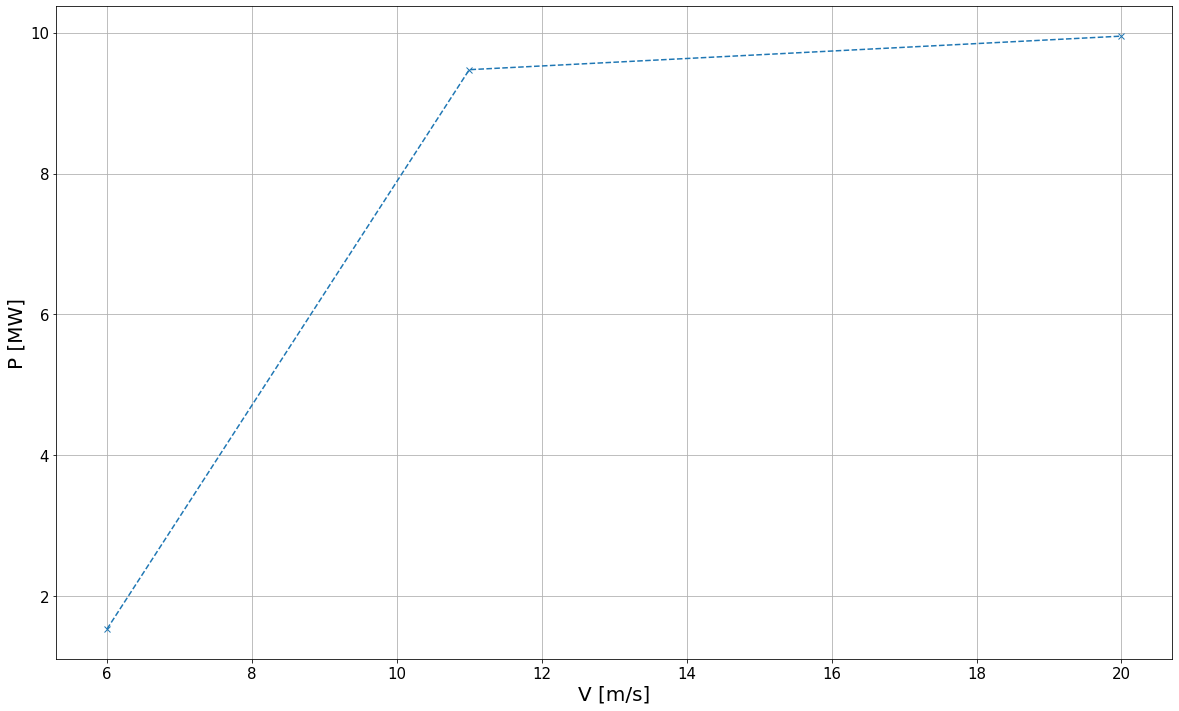

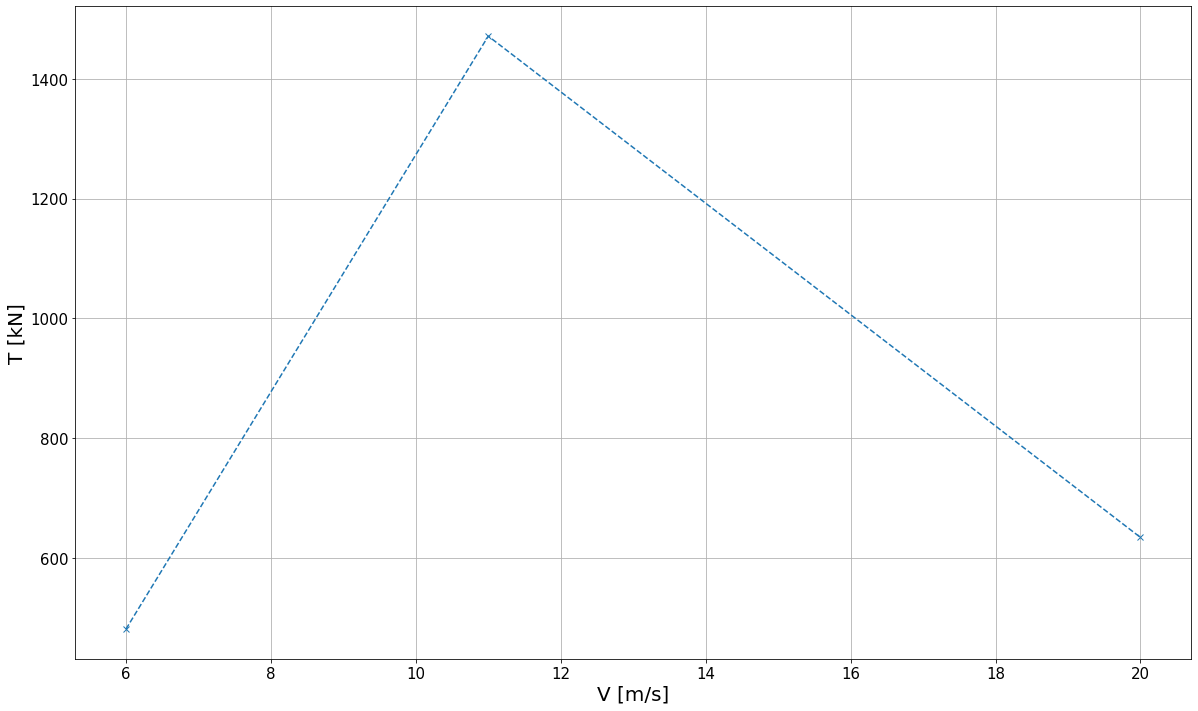

In [84]:
u=[6,11,20]
#u=[6]
P=np.zeros(len(u))
T=np.zeros(len(u))

df=blade_dat.iloc[0:-1]   #?

pN=np.zeros([len(u),len(df.r)+1])
pT=np.zeros([len(u),len(df.r)+1])

for j in range(len(u)):
    w=WT_data.loc[u[j]].RPM*np.pi/30
    pitch=WT_data.loc[u[j]].pitch
    TSR=w*R/u[j]
    print(TSR)
    print(w)
    print(pitch)
    P[j],T[j],pT[j,],pN[j,]=power(TSR,u[j],df.beta+pitch,df.r,df.c,df.t_c)
power_plotter(u,P/10**6)
thrust_plotter(u,T/10**3)

In [90]:
P

array([1533608.93315365, 9473473.97900853, 9949669.90390018])

In [60]:
pN[0]

array([  56.73502664,  128.66511904,  196.82870201,  955.83255009,
       1372.0058535 , 1685.01982088, 2137.75442846, 2601.22578824,
       2986.14621076, 3263.07927127, 3431.68926186, 3461.78866371,
       3474.49291476, 3421.50774457, 3224.94102283, 2815.05298268,
       2063.40641495,    0.        ])

Check load distribution from Martin

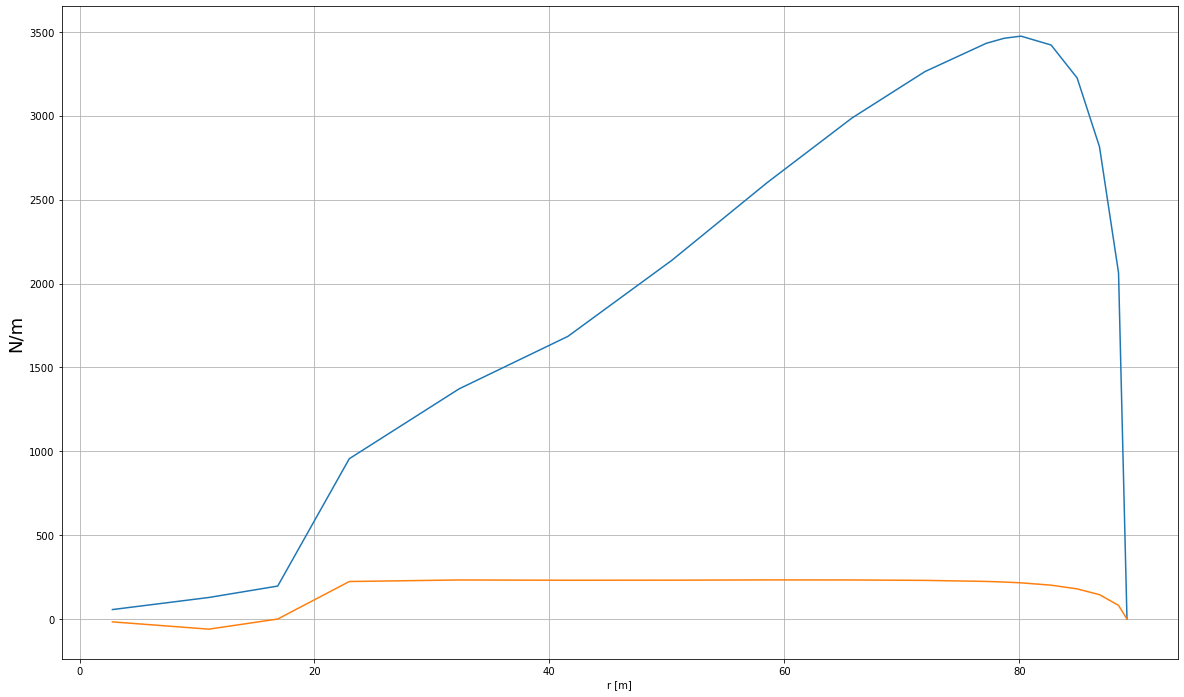

In [20]:
#Plot the loads.
plt.figure(figsize=[20,12])
plt.plot(blade_dat.r, pN[0])
plt.plot(blade_dat.r, pT[0])
plt.ylabel('N/m', fontsize=18)
plt.xlabel('r [m]')
plt.grid()

# Q2 compute  shear stress and the bending moment  distribution for the three wind speeds

In [21]:
def shear(pT,pN,r):
    N=len(pT)
    Ty,Tz=np.zeros(N),np.zeros(N)
    
    for i in range(2,N+1):
        Ty[N-i]=Ty[N-i+1]+0.5*(pT[N-i]+pT[N-i+1])*(r[N-i+1]-r[N-i])
        Tz[N-i]=Tz[N-i+1]+0.5*(pN[N-i]+pN[N-i+1])*(r[N-i+1]-r[N-i])
    
    return Ty,Tz

def bending(Ty,Tz,pT,pN,r):
    N=len(Ty)
    My,Mz=np.zeros(N),np.zeros(N)
    
    for i in range(2,N+1):
        My[N-i]=My[N-i+1]-Tz[N-i+1]*(r[N-i+1]-r[N-i])-(1/6*pN[N-i]+1/3*pN[N-i+1])*(r[N-i+1]-r[N-i])**2
        Mz[N-i]=Mz[N-i+1]+Ty[N-i+1]*(r[N-i+1]-r[N-i])+(1/6*pT[N-i]+1/3*pT[N-i+1])*(r[N-i+1]-r[N-i])**2
        
        
    return My,Mz
    

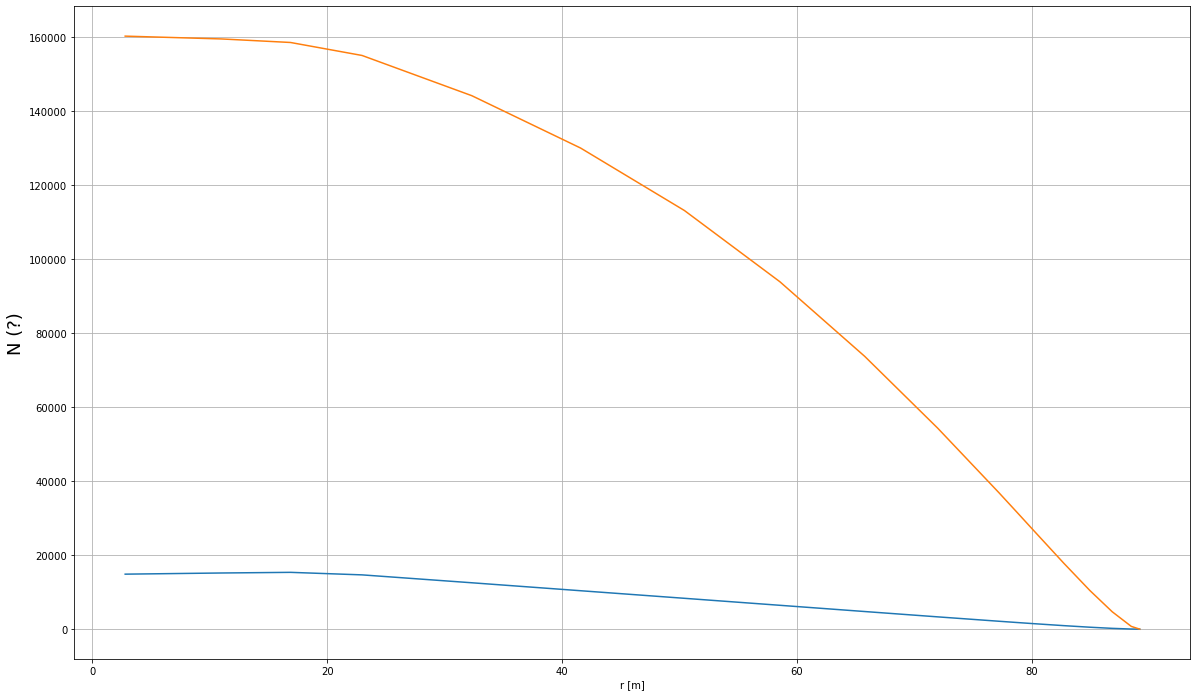

In [22]:
#Plot the shear
plt.figure(figsize=[20,12])
plt.plot(blade_dat.r, shear(pT[0],pN[0],blade_dat.r)[0])   #Ty
plt.plot(blade_dat.r, shear(pT[0],pN[0],blade_dat.r)[1])
plt.ylabel('N (?)', fontsize=18)
plt.xlabel('r [m]')
plt.grid()

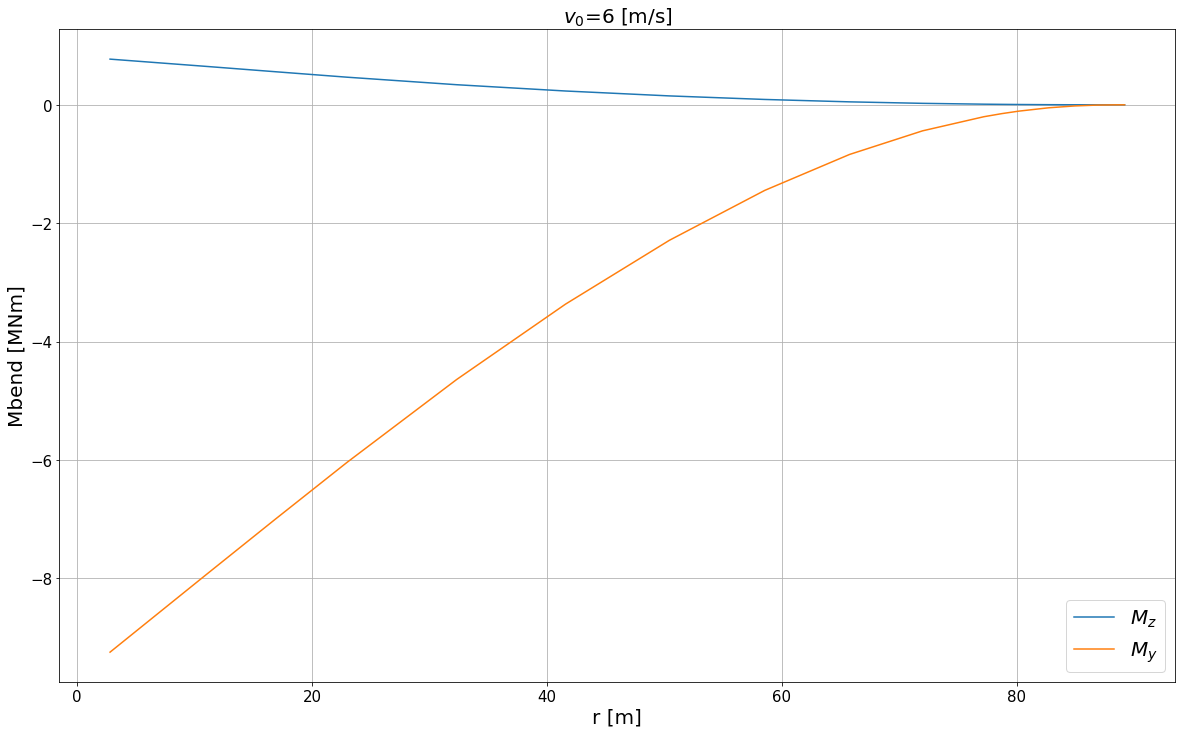

In [23]:
#Plot the bending moment.
N=len(blade_dat.r)
Ty,Tz,My,Mz=np.zeros([len(u),N]),np.zeros([len(u),N]),np.zeros([len(u),N]),np.zeros([len(u),N])
for i in range(len(u)):  #Just if more than 1 plot is needed. 
    Ty[i,],Tz[i,]=shear(pT[i,],pN[i,],blade_dat.r.values)
    My[i,],Mz[i,]=bending(Ty[i,],Tz[i,],pT[i,],pN[i,],blade_dat.r.values)
    bending_plotter(blade_dat.r.values,Mz[i,],My[i,],u[i])   #change here Mz and My for Tz-Ty for plotting shear.
    

# Q3 - static deflections

#  carga bladestruc

In [24]:
#EI [Nm^2]
#mass [kg/m]
#pitch and twist in deg
blade_str=pd.read_csv('bladestruc.txt',names=["r","struc_pitch","mass","EIy","EIz","twist"], sep='\s+')

FileNotFoundError: [Errno 2] No such file or directory: 'bladestruc.txt'

In [ ]:
np.arange(0,1.01,0.01)

In [ ]:
#convert beta to rad?
def deflector(My,Mz,EIy,EIz,beta,pitch,r):
    EI1,EI2=np.ones(101),np.ones(101)             #EIy,EIz
    pitch=np.zeros(101)                 #np.deg2rad(pitch)
    beta=np.zeros(101)                               #np.deg2rad(beta)
    N=len(r)
    #M1,M2=np.zeros(N),np.zeros(N)
    #k1,k2=np.zeros(N),np.zeros(N)
    #for i in range(N):
        #M1[i]=My[i]*m.cos(beta[i]+pitch[i])-Mz[i]*m.sin(beta[i]+pitch[i])
        #M2[i]=Mz[i]*m.sin(beta[i]+pitch[i])+Mz[i]*m.cos(beta[i]+pitch[i])
    M1=My*np.cos(beta+pitch)-Mz*np.sin(beta+pitch)
    M2=My*np.sin(beta+pitch)+Mz*np.cos(beta+pitch)
    k1,k2=M1/EI1,M2/EI2
    kz=-k1*np.sin(beta+pitch)+k2*np.cos(beta+pitch)
    ky=k1*np.cos(beta+pitch)+k2*np.sin(beta+pitch)
    
    Thetay,Thetaz=np.zeros(N),np.zeros(N)
    #BC:thetay[1]=0,thetaz[1]=0
    for i in range(N-1):
        Thetay[i+1]=Thetay[i]+0.5*(ky[i+1]+ky[i])*(r[i+1]-r[i])
        Thetaz[i+1]=Thetaz[i]+0.5*(kz[i+1]+kz[i])*(r[i+1]-r[i])
    #BC:uy[1]=0,uz[1]=0
    uy,uz=np.zeros(N),np.zeros(N)
    for i in range(N-1): 
        uy[i+1]=uy[i]+Thetaz[i]*(r[i+1]-r[i])+(1/6*kz[i+1]+1/3*kz[i])*(r[i+1]-r[i])**2
        uz[i+1]=uz[i]-Thetay[i]*(r[i+1]-r[i])-(1/6*ky[i+1]+1/3*ky[i])*(r[i+1]-r[i])**2
    
    return uy,uz
        
        
        

In [ ]:
uy=np.zeros([len(u),len(blade_dat.r)])
uz=np.zeros([len(u),len(blade_dat.r)])
for i in range(len(u)):
    r=blade_dat.r.values
    uy[i,],uz[i,]=deflector(My[i,],Mz[i,],blade_str.EIy.values,blade_str.EIz.values,blade_str.twist.values,blade_str.struc_pitch.values,r)
    deflection_plotter(r,uy[i,],uz[i,],u[i])
    

In [ ]:
uz[1,]

#### Why less deflection at high wind speeds?
BC of deloading the blade, and when you pitch the blade it can bend less in streamwise dir.

# Eigenvalues

In [ ]:
def deflect(pT,pN):
    r=np.arange(0,1.01,0.01)
    Ty,Tz=shear(pT,pN,r)
    My,Mz=bending(Ty,Tz,pT,pN,r)
    #bending_plotter(blade_dat.r.values,Mz,My,u) #needs u.....
    uy,uz=deflector(My,Mz,blade_str.EIy.values,blade_str.EIz.values,blade_str.twist.values,blade_str.struc_pitch.values,r)
    #deflection_plotter(r,uy,uz,"NA")
    return uy,uz


In [ ]:
#stiffness matrix
def stiff():
    """Compute the stiffnes matrix with dimension 2*N-2 , where N=len(blade_dar.r)"""
    N=101          #len(blade_dat.r.values)
    M=2*N-2
    pN=np.zeros(N)
    pT=np.zeros(N)
    a=np.zeros([M,M])
    j=0
    for i in range(len(blade_str.r)-1):
        pT[i+1]=1
        uy,uz=deflect(pT,pN)
        a[:,j]=np.append(uy[1:],uz[1:])
#         if i==0:
#             print(a[:,j])
#             print(a[:,j].shape)
        pT[i+1]=0
        pN[i+1]=1
        uy,uz=deflect(pT,pN)
        a[:,j+1]=np.append(uy[1:],uz[1:])
        pN[i+1]=0
        j+=2
    F=np.zeros([M,M])
    for i in range(M):
        j=0
        for k in range(N-1):
            F[j,i]=a[k,i]
            F[j+1,i]=a[N-1+k,i]
            j+=2
    return F
     
    

In [ ]:
Fconst=stiff()
Fconst

In [ ]:
F=stiff()
F

## testing correct F? 

In [ ]:
#loads for u=10
PTN2=np.zeros(2*int(len(pT[2,])-1))
j=0
for k in range(1,len(pT[2,])):
    PTN2[j]=pT[2,k]
    PTN2[j+1]=pN[2,k]
    j+=2
UTN2=np.zeros(2*int(len(uy[2,])-1))
j=0
for k in range(1,len(uy[2,])):
    UTN2[j]=uy[2,k]
    UTN2[j+1]=uz[2,k]
    j+=2

In [ ]:
F.dot(PTN2.T)

In [ ]:
uz[2,]

In [ ]:
uy[2,]

In [ ]:
np.ones(101)

In [ ]:
# mass matrix
M=np.zeros(2*len(np.ones(101))-2)
j=0
for i in np.ones(101)[1:]:
    M[j]=i
    M[j+1]=i
    j+=2

In [ ]:
M=np.diag(M)

In [ ]:
M

In [ ]:
M.shape

In [ ]:
eigvals,eigvecs=np.linalg.eig(np.dot(Fconst,M))

In [ ]:
eigvecs

In [ ]:
nmode=3
r=np.arange(0,1.01,0.01)
ymodes=np.zeros([len(r)-1,nmode])
zmodes=np.zeros([len(r)-1,nmode])
for j in range(nmode):
    #decoupling of eigenvectors
    ymodes[:,j]=eigvecs[np.arange(0,(len(r)-1)*2,2),j]
    zmodes[:,j]=eigvecs[np.arange(1,(len(r)-1)*2,2),j]

    if max(abs(ymodes[:,j]))>max(abs(zmodes[:,j])):
        standard=max(abs(ymodes[:,j]))
    else:
        standard=max(abs(zmodes[:,j]))
    eigen_plotter(r[1:]/R,ymodes[:,j]/standard,zmodes[:,j]/standard,np.sqrt(1/eigvals[2*j]),np.sqrt(1/eigvals[2*j+1]))

## Plots in bigger cells

In [ ]:
eigen_plotter(r[1:]/R,ymodes[:,0]/max(abs(zmodes[:,0])),zmodes[:,0]/max(abs(zmodes[:,0])),np.sqrt(1/eigvals[2*0]),np.sqrt(1/eigvals[2*0+1]))

In [ ]:
eigen_plotter(r[1:]/R,ymodes[:,1]/max(abs(ymodes[:,1])),zmodes[:,1]/max(abs(ymodes[:,1])),np.sqrt(1/eigvals[2*1]),np.sqrt(1/eigvals[2*1+1]))

In [ ]:
eigen_plotter(r[1:]/R,ymodes[:,2]/max(abs(zmodes[:,2])),zmodes[:,2]/max(abs(zmodes[:,2])),np.sqrt(1/eigvals[2*2]),np.sqrt(1/eigvals[2*2+1]))

In [ ]:
zmodes[:,1]

In [ ]:
deflector(My,Mz,EIy,EIz,beta,pitch,r)